# Experimenting skewness

Skewness in the distribution of data can have an impact on regression models, particularly linear regression. Skewness refers to the lack of symmetry in the data distribution, where the data is more concentrated on one side of the mean than the other. Understanding the impact of skewness is crucial when building and interpreting regression models:

### Residual Assumption Violation:
Linear regression models assume that the residuals (the differences between the observed values and the predicted values) are normally distributed and have constant variance. Skewness in the data can lead to non-normally distributed residuals, violating this assumption.
### Biased Coefficient Estimates:
Skewness can lead to biased coefficient estimates in linear regression. When the data is skewed, the least squares method used in linear regression tends to be more influenced by extreme values, which can affect the model's ability to estimate coefficients accurately.
### Heteroscedasticity:
Skewed data can also lead to heteroscedasticity, which is a situation where the variance of the residuals is not constant across the range of the predictor variables. Heteroscedasticity violates the assumption of constant variance in linear regression
### Influences Outliers:
Skewness can make outliers more influential in a regression model. Outliers are data points that deviate significantly from the rest of the data. In a skewed distribution, outliers may have a larger impact on the model's coefficients.
### Model Interpretation:
Skewed data can complicate the interpretation of regression coefficients. In a skewed distribution, the relationship between the independent variable and the dependent variable may not be linear, which can lead to misinterpretation of the regression results.


In [37]:
import pandas as pd
import numpy as np

data = {
    'A':np.random.normal(loc=50,scale=5,size=10000)
}

df = pd.DataFrame(data)

# column B follows linear regression assumption
df['B'] = df['A']*3+np.random.normal(loc=0,scale=3,size=10000)

# some of the values of column C are shifted to right to add skewness in column C
threshold = df['A'].quantile(0.9)
uniform_noise = np.random.uniform(low=2,high=10,size=10000)
df['C'] = df['A']*3+np.random.normal(loc=0,scale=3,size=10000)+np.where(df['A']>threshold,5,0)




In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X1 = df[['A']]
Y1 = df['B']
Y2 = df['C']
Y3 = np.log(df['C'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, Y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, Y3, test_size=0.2, random_state=42)

# A column maps to column B
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
print("Test Error (First column to Second column):", mse1)

# A column maps to column C without transformation
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
print("Test Error (First column to Third column):", mse2)

# A column maps to column C with log transformation
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y3_pred = model3.predict(X3_test)
mse3 = mean_squared_error(np.exp(y3_test), np.exp(y3_pred))
print("Test Error (First column to Third column with transformation):", mse3)

Test Error (First column to Second column): 9.225321793596434
Test Error (First column to Third column): 10.141640050482833
Test Error (First column to Third column with transformation): 9.921642005147914


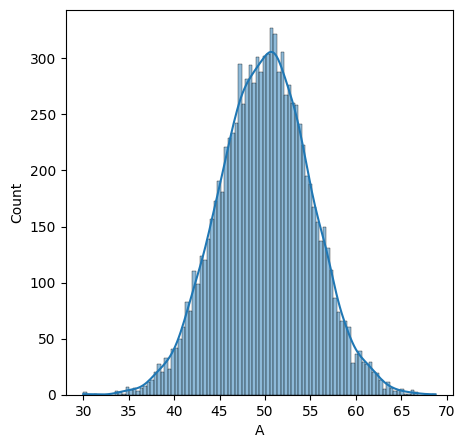

In [39]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='A', kde=True,bins=100)
plt.show()

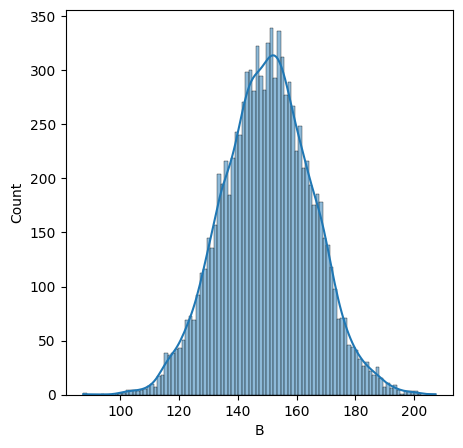

In [40]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='B', kde=True,bins=100)
plt.show()

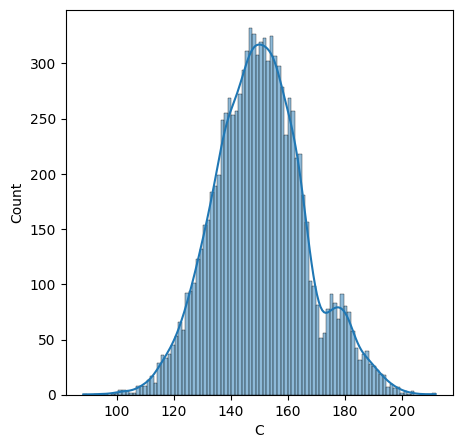

In [41]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='C', kde=True,bins=100)
plt.show()